In [19]:
import pandas as pd 
players = pd.read_csv("players_transformed.csv", delimiter = ',')
stats = pd.read_csv("stats_clean.csv", delimiter = ',')

In [20]:
players.head()

PlayerName         Affiliation              League  \
0     Ian Raeymaekers         Ksc Lokeren  Jupiler Pro League   
1      Mohamed Camara        Es Troyes Ac             Ligue 1   
2       Pablo Olivera       Moreirense Fc  Liga Portugal Bwin   
3      Aliosman Aydin  Fortuna Dusseldorf          Bundesliga   
4  Jaime Alfonso Ruiz         Kv Mechelen  Jupiler Pro League   

   Height (meters) Citizenship 1   Age Position      Position 2   Foot  \
0                0       Belgium  28.0  Forward  Centre-Forward  Right   
1              180        Guinea  32.0  Forward  Centre-Forward  Right   
2              175       Uruguay  35.0  Forward  Centre-Forward  Right   
3              178        Turkey  31.0  Forward  Centre-Forward  Right   
4              184      Colombia  39.0  Forward  Centre-Forward  Right   

      Agent ContractExpiration nationality  Market Value (Euros)  \
0  No Agent                NaN     Belgium                   NaN   
1  No Agent                NaN      Guinea                   NaN   
2  No Agent                NaN     Uruguay               25000.0   
3  No Agent                NaN     Germany                   NaN   
4  No Agent                NaN    Colombia                   NaN   

   Highest Market Value (Euros)  Year  
0                       50000.0  1995  
1                      300000.0  1991  
2                      600000.0  1988  
3                      125000.0  1992  
4                     1700000.0  1984

In [21]:
stats.head()

PlayerName    Position     Affiliation      League  Born  MP  Starts  \
0  Yunis Abdelhamid    Defender           Reims     Ligue 1  1987  34      34   
1      Nayef Aguerd    Defender          Rennes     Ligue 1  1996  31      31   
2  Sofiane Alakouch    Defender            Metz     Ligue 1  1998   4       0   
3    Sofyan Amrabat  Midfielder      Fiorentina     Serie A  1996  23       8   
4      Aymen Barkok  Midfielder  Eint Frankfurt  Bundesliga  1998   5       2   

    Min   90s  Goals  ...   Crs  TklW  PKwon  PKcon   OG  Recov  AerWon  \
0  2983  33.1   0.06  ...  0.06  1.39   0.00   0.03  0.0   6.77    2.02   
1  2735  30.4   0.07  ...  0.07  0.39   0.03   0.07  0.0   7.63    3.55   
2   158   1.8   0.00  ...  0.56  3.33   0.00   0.00  0.0   8.89    0.56   
3   944  10.5   0.10  ...  0.29  2.10   0.00   0.00  0.0  10.90    0.95   
4   160   1.8   0.00  ...  0.00  1.67   0.00   0.00  0.0  11.70    3.33   

   AerLost  AerWon%  nationality  
0     1.36     59.8      Morocco  
1     1.51     70.1      Morocco  
2     0.56     50.0      Morocco  
3     1.62     37.0      Morocco  
4     1.11     75.0      Morocco  

[5 rows x 141 columns]

In [22]:
players['League'] = players['League'].replace('Laliga', 'La Liga')

In [23]:
stats = stats.rename(columns={'Born': 'Year'})

In [24]:
players = players.drop('Affiliation',axis=1)
players = players.drop('League',axis=1)

In [25]:
merged_df = pd.merge(players, stats, on=['PlayerName', 'nationality', 'Position', 'Year'])

In [26]:
merged_df.head()

PlayerName  Height (meters) Citizenship 1   Age    Position  \
0         José Ángel              187         Spain  34.0    Defender   
1     Mamadou Camara              184        France  22.0     Forward   
2          Rey Manaj              182       Albania  26.0     Forward   
3     Suf Podgoreanu              193        Israel  21.0     Forward   
4  Aurélien Nguiamba              179        France  24.0  Midfielder   

           Position 2   Foot                        Agent ContractExpiration  \
0         Centre-Back  Right                     No Agent         2023-06-30   
1      Centre-Forward  Right            AIS SPORT SERVICE         2025-06-30   
2      Centre-Forward  Right       Niagara Sports Company         2025-06-30   
3        Right Winger  Right  P&P Sport Management S.A.M.         2023-06-30   
4  Defensive Midfield   Left            BS Group - BS Law         2024-06-30   

  nationality  ...   Off   Crs  TklW PKwon PKcon   OG  Recov  AerWon  AerLost  \
0       Spain  ...  0.00  2.67  2.00  0.00   0.0  0.0  10.60    1.33     0.42   
1      France  ...  0.00  0.00  0.00  0.00   0.0  0.0   2.50   10.00     7.50   
2     Albania  ...  0.56  0.31  0.51  0.05   0.0  0.0   4.39    3.67     5.87   
3      Israel  ...  0.00  4.62  3.08  0.00   0.0  0.0   3.08    2.31     0.00   
4      France  ...  0.00  1.67  3.33  0.00   0.0  0.0  21.70    0.00     6.67   

   AerWon%  
0     76.2  
1     57.1  
2     38.5  
3    100.0  
4      0.0  

[5 rows x 150 columns]

In [27]:
merged_df = merged_df.sort_values("PlayerName")

# Reset the index
merged_df = merged_df.reset_index(drop=True)

In [28]:
merged_df.to_csv('merged.csv', index=False)

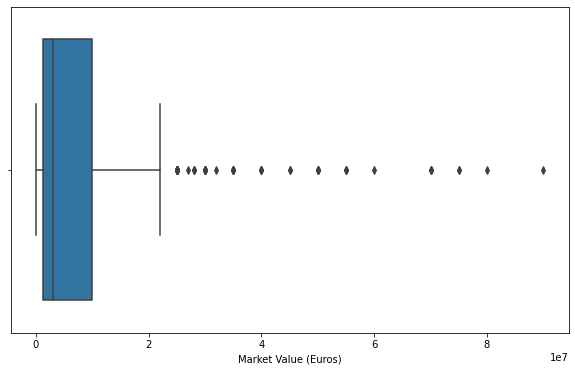

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

q3 = merged_df['Market Value (Euros)'].quantile(0.75)
q1 = merged_df['Market Value (Euros)'].quantile(0.25)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
outliers = merged_df[merged_df['Market Value (Euros)'] > upper_limit]

lower_limit = q1 - 1.5 * iqr
outliers = merged_df[merged_df['Market Value (Euros)'] < lower_limit]


# Selecionando as variáveis numéricas
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns

# Plotando boxplots para as variáveis numéricas
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df["Market Value (Euros)"])
plt.show()


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
merged_df = pd.read_csv('merged.csv')

# Identificar as variáveis mais correlacionadas com o valor de mercado dos jogadores
corr_matrix = merged_df.corr()

# Plotar a matriz de correlação
fig, ax = plt.subplots(figsize=(200, 200))
sns.heatmap(corr_matrix, annot=True)
plt.show()
